In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from Module import ImportTripleStore as its
from Module import LinearRegression as lr
link_core = "https://materialdigital.github.io/core-ontology/ontology.rdf"
link_ontoFNCT = "https://markusschilling.github.io/ontoFNCT/ontology.rdf"
link_data = "https://raw.githubusercontent.com/MarkusSchilling/ontoFNCT/main/analysis/ontoFNCT_exemplary_data_PE-HD.rdf"
triple_store = its.get_triple_store(link_core, link_ontoFNCT, link_data)
data = its.get_dataframe(triple_store)

There are 2 unique materials and 2 unique media.
AGUV | Arkopal t9 = 56.6 R = -0.99 | P =  0.001
AGUV | Distilled Water t9 = 192.3 R = -0.90 | P =  0.039
5021DX | Arkopal t9 = 7.2 R = -0.97 | P =  0.005
5021DX | Distilled Water t9 = 8.8 R = -0.93 | P =  0.020


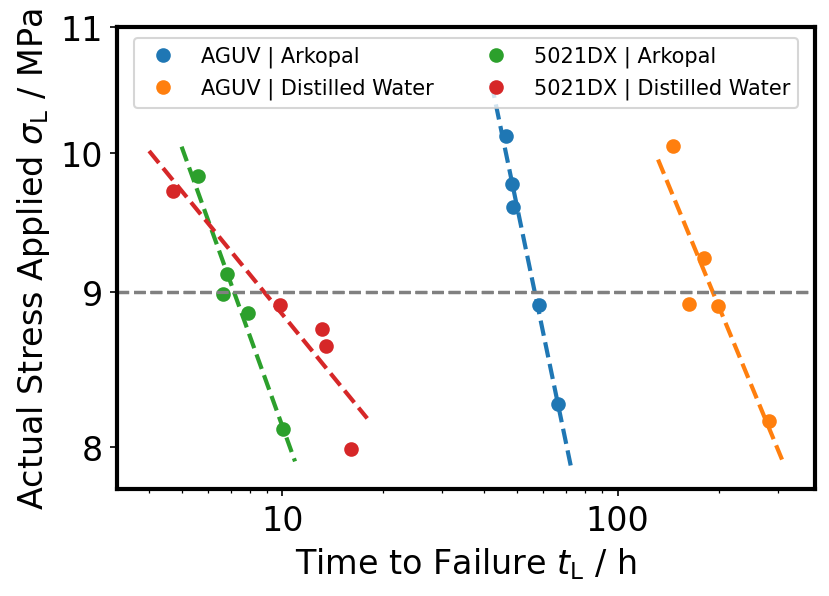

In [23]:
## get unique content
# 0: Process_ID, 1: Material, 2: Medium, 3: Time to failure tf, 4: Stress measured sigmaL
#             - - -	h MPa
unique_mat = pd.unique(data[1])
unique_med = pd.unique(data[2])
# label_dic is set manual 
label_dic = {"PE-HD Lupolen 4261 AG UV 60005": "AGUV", "PE-HD Lupolen 5021 DX": "5021DX"} 
print("There are " + str(len(unique_mat)) + " unique materials and " + str(len(unique_med)) + " unique media.")
# create figure for comparison
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
plt.rcParams.update({"font.size": 16})
idx = 0
for mat in unique_mat:
    for med in unique_med:
        ## filter and select data
        mask_Material = data[1] == mat
        mask_Medium = data[2] == med
        mask = np.array(mask_Material * mask_Medium)
        if any(mask):
            arr = data[[3, 4]].to_numpy(dtype=np.float64)
            time = arr[mask[:]][:, 0]
            stress = arr[mask[:]][:, 1]
            time9, time_reg, stress_reg, trange, srange, r_value, p_value, std_err = lr.get_regression(time, stress)
            ## plotting 
            ax.loglog(time, stress, "o", c=colors[idx], lw=2, label=label_dic[mat] + " | " + med )
            ax.loglog(time_reg, stress_reg, c=colors[idx], ls="--",  lw=2)
            #ax.fill_between(time_reg, stress_reg-limit, stress_reg+limit, color=colors[idx], alpha=0.5)
            ax.axhline(y = 9, c="grey", ls="--")
            #ax.annotate("$t_\mathrm{f}^*$ = " + str(time9), (time9, 9+anno[idx]), fontsize=12)
            print(label_dic[mat] + " | " + med + " t9 = " + str(time9), "R = {:.2f}".format(r_value), "| P =  {:.3f}".format(p_value))
            idx += 1
        else: 
            print("Material "+mat+" and medium "+med+" combination is not available.")
ax.legend(loc="upper center", ncol=int(idx/2), prop={"size": 10})
for pos in ["top", "bottom", "left", "right"]:
    ax.spines[pos].set_linewidth(2)
ax.set_xlabel("Time to Failure $t_\mathrm{L}$ / h")
ax.set_ylabel("Actual Stress Applied $\sigma_\mathrm{L}$ / MPa")
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
## following ticks are set manual
ax.set_xticks([10, 100])
ax.set_yticks([8, 9, 10, 11])
fig.savefig("LifetimeRegression.png", bbox_inches="tight")
plt.show()